In [347]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import scipy.stats as st
import seaborn as sns

In [349]:
def plot_t_days(time):
    for i in range(300):
        if df.iloc[i][1]==-1:
            plt.scatter(x[i], y[i], marker = "o", s = 10, edgecolors='black', facecolors='none')
        else:
            if time<df.iloc[i][1]:
                plt.scatter(x[i], y[i], marker = "o", s = 10, edgecolors='black', facecolors='none')
            elif df.iloc[i][1]<=time<df.iloc[i][2]:
                plt.scatter(x[i], y[i], marker = "o", s = 10, edgecolors='red', facecolors='red')
            else:
                plt.scatter(x[i], y[i], marker = "o", s = 10, edgecolors='blue', facecolors='blue')
    plt.show()

In [350]:
df = pd.read_csv('records.csv')
x = df["position_x"]
y = df["position_y"]

(-1.0, 40.0)

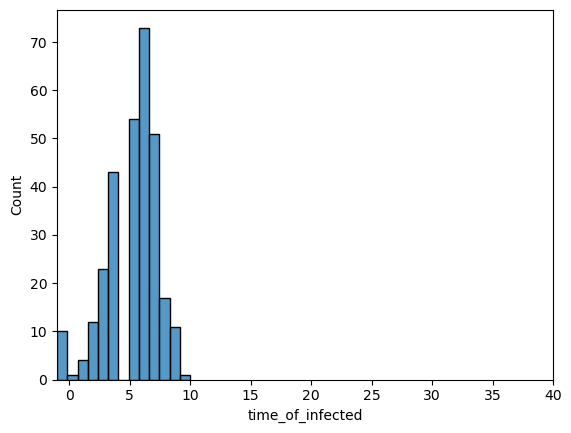

In [351]:
time = df["time_of_infected"]
sns.histplot(time)
plt.xlim(-1, 40)

# Distribution of the population
The distribution of the population comes from $K=3$ clusters, where the positions of members in each cluster follow a bivariate Gaussian distribution. By adjusting the covariance, the three clusters are mixed to a certain extent.

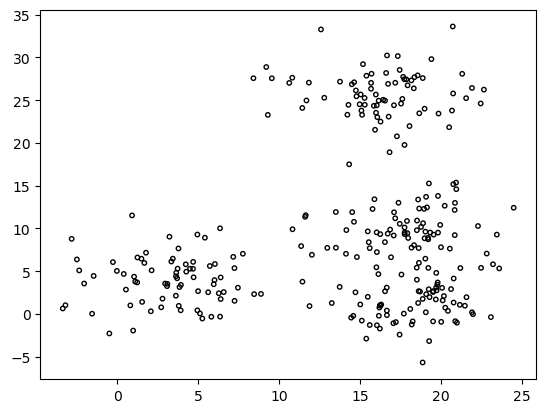

In [352]:
#Each individuals' location before the outbreak
plt.scatter(x, y, marker = "o", s = 10, edgecolors='black', facecolors='none')
plt.show()

In [353]:
X = df[["position_x", "position_y"]].values
n_clusters = 3
# Initialize and fit the KMeans model
'''
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster.labels_ 
X = df[["position_x", "position_y"]].values
'''
y_pred = df["cluster_id"]

# Clustering
Each cluster represented by a distinct color:

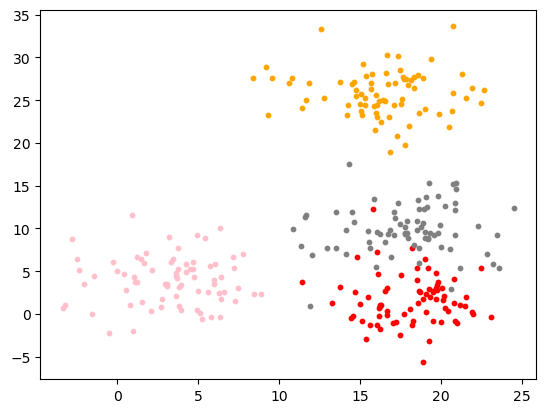

In [354]:
#centroid = cluster.cluster_centers_
n_clusters = 4
color=['red','pink','orange','gray','yellow','purple']
fig, axi1=plt.subplots(1)
for i in range(n_clusters):
    axi1.scatter(X[y_pred==i, 0], X[y_pred==i, 1],
               marker='o',
               s=10,
               c=color[i])
#axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')

In [355]:
df["cluster_id"] = y_pred

In [356]:
df

,id,time_of_infected,time_of_removed,position_x,position_y,susceptibility level,infectivity level,cluster_id
0,0,5,8,16.1348,4.650820,0.278708,1,0
1,1,6,9,15.6007,-1.299330,0.576421,1,0
2,2,7,10,19.0679,0.187197,0.700971,1,0
3,3,6,9,20.9928,-1.033660,0.206750,1,0
4,4,4,7,13.2524,1.270370,0.612861,1,0
...,...,...,...,...,...,...,...,...
295,295,6,9,22.2919,10.272400,0.450270,1,3
296,296,5,8,17.9022,10.863400,0.892890,1,3
297,297,6,9,15.5995,7.688070,0.419198,1,3
298,298,3,6,18.6404,5.967770,0.719906,1,3


In [357]:
df.to_csv("records.csv", index=False)

# Infection process
- white: Susceptible
- red: Infected
- blue: Recovered   
By adjusting the value of $\beta$, the distance effect is reduced. As a result, although infections are more likely to occur among neighboring populations, it is also possible for transmission to happen among populations that are farther apart (for instance, on day 3, two distant individuals became infected).

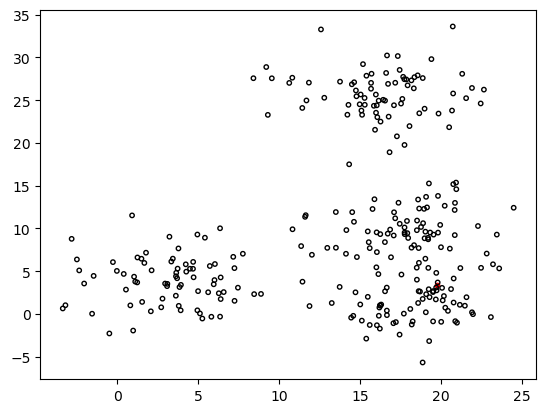

In [358]:
#t day after the outbreak
#compare with epiILM
#cran fortran 
plot_t_days(0)

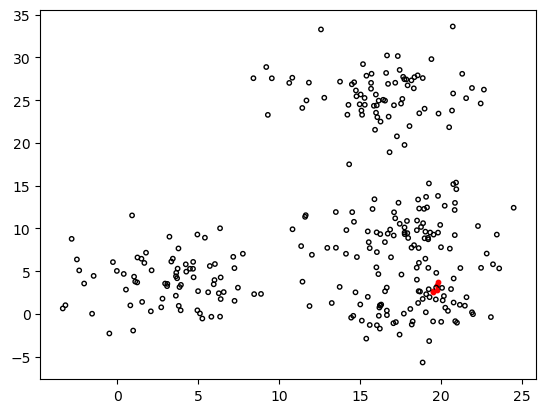

In [359]:
plot_t_days(1)

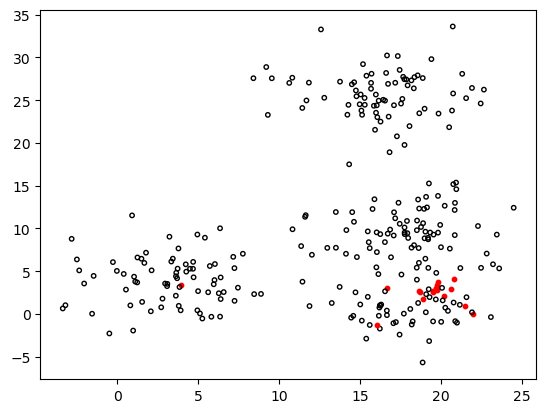

In [360]:
plot_t_days(2)

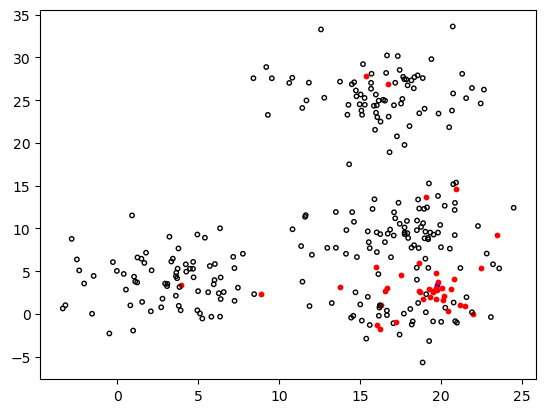

In [361]:
plot_t_days(3)

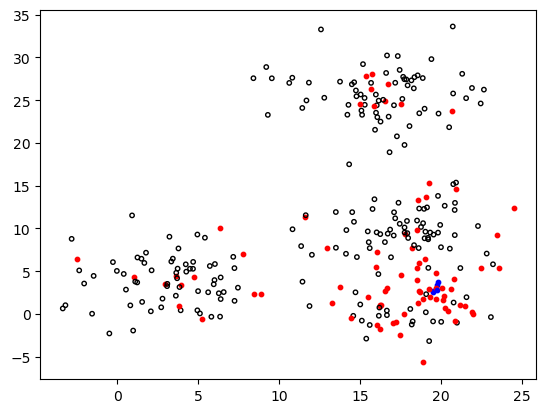

In [362]:
plot_t_days(4)

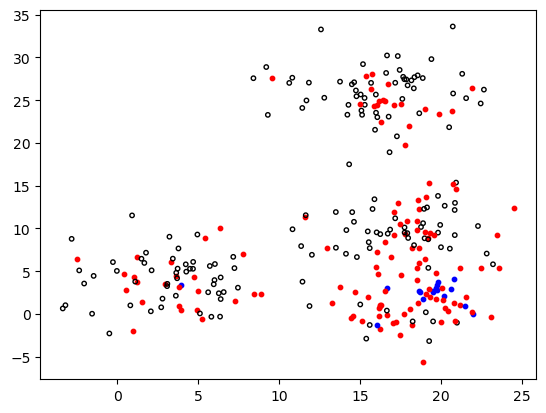

In [363]:
plot_t_days(5)

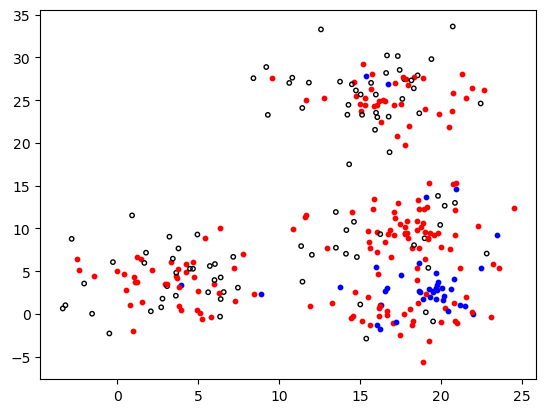

In [364]:
plot_t_days(6)

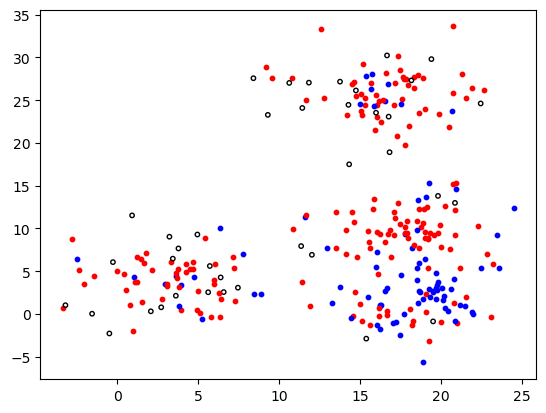

In [365]:
plot_t_days(7)

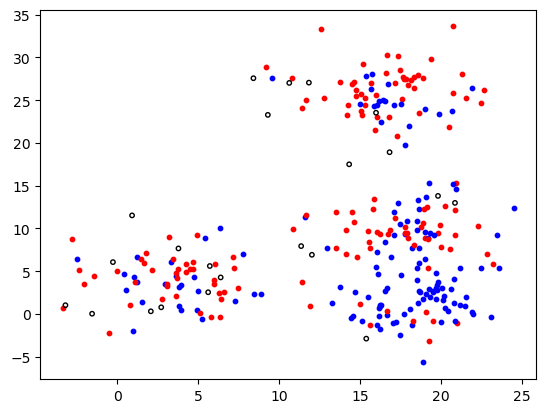

In [366]:
plot_t_days(8)

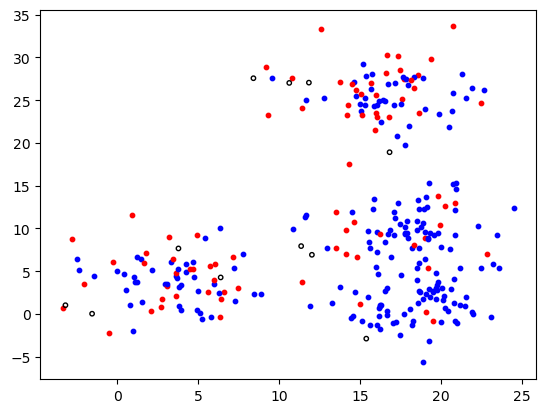

In [367]:
plot_t_days(9)

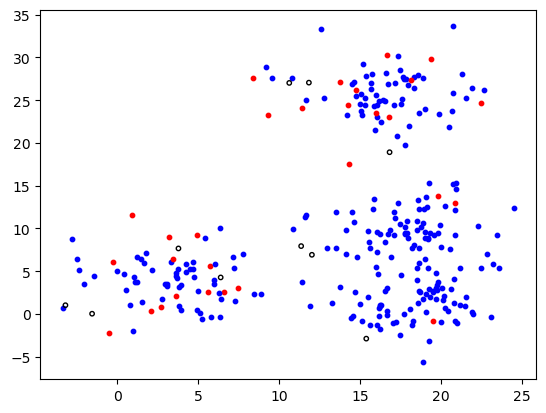

In [368]:
plot_t_days(10)

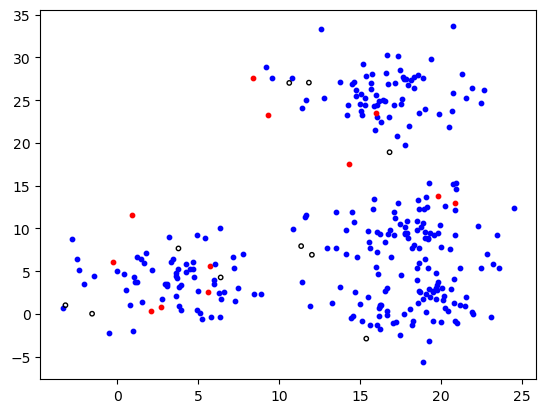

In [369]:
plot_t_days(11)

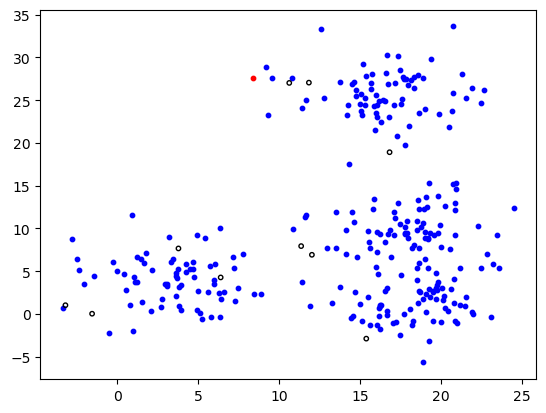

In [370]:
plot_t_days(12)

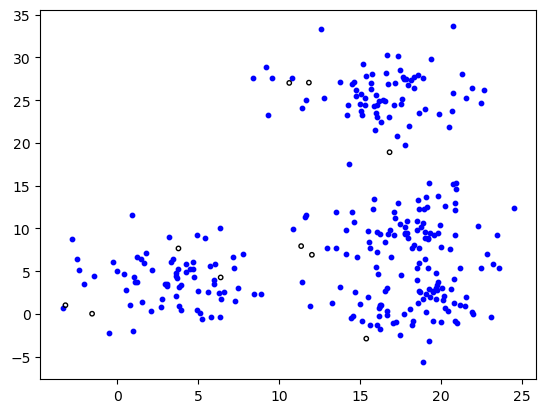

In [371]:
plot_t_days(13)

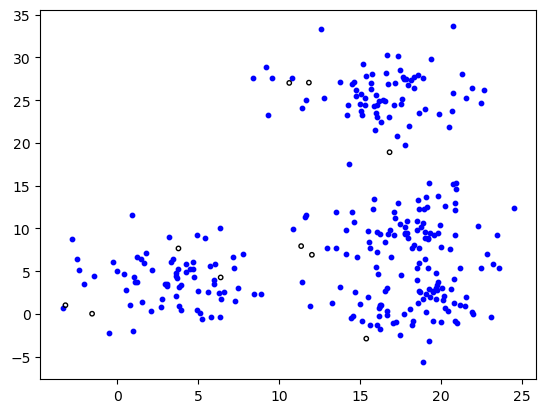

In [372]:
plot_t_days(14)

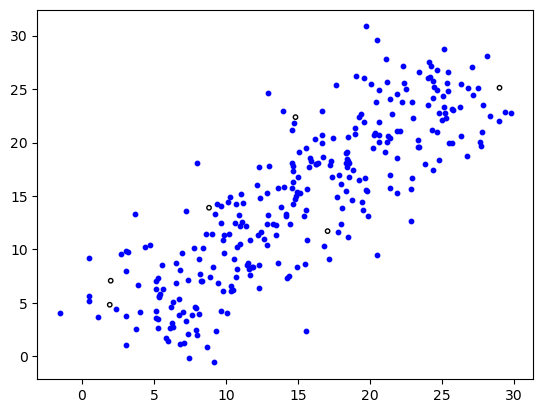

In [337]:
plot_t_days(15)

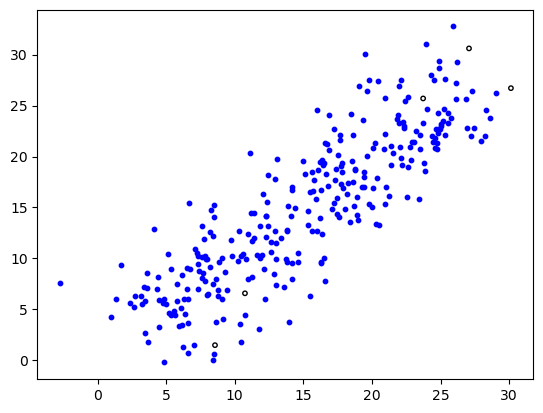

In [264]:
plot_t_days(16)

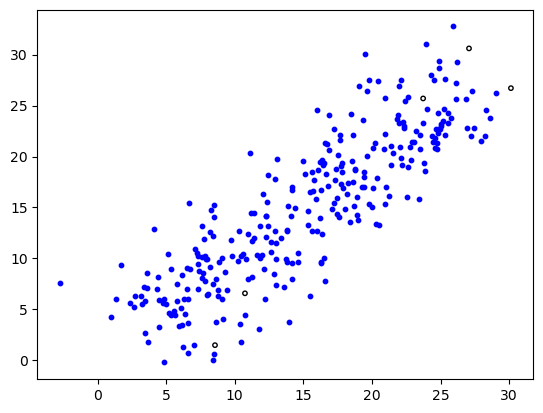

In [265]:
plot_t_days(17)

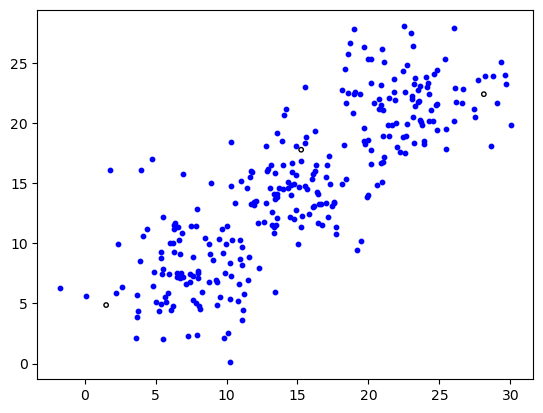

In [159]:
plot_t_days(18)

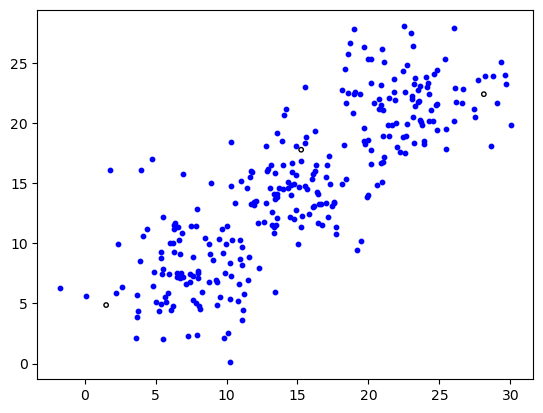

In [160]:
plot_t_days(19)

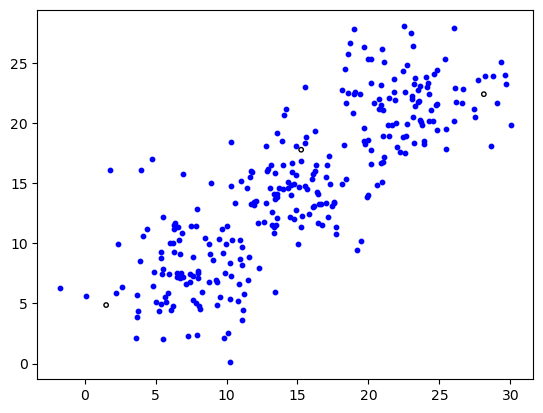

In [161]:
plot_t_days(20)

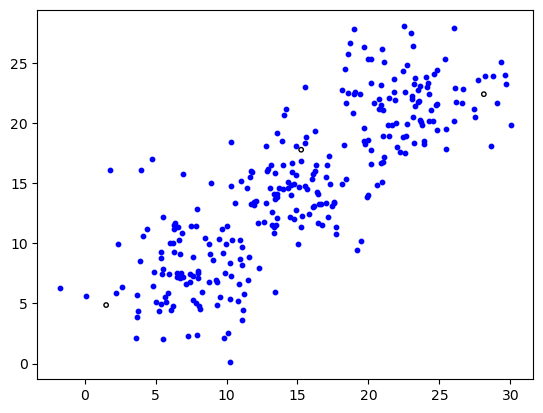

In [162]:
plot_t_days(21)

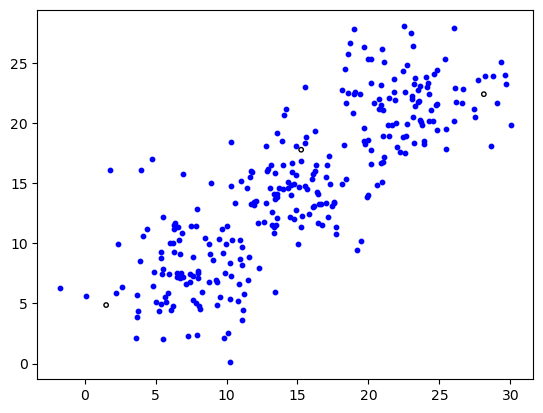

In [163]:
plot_t_days(22)

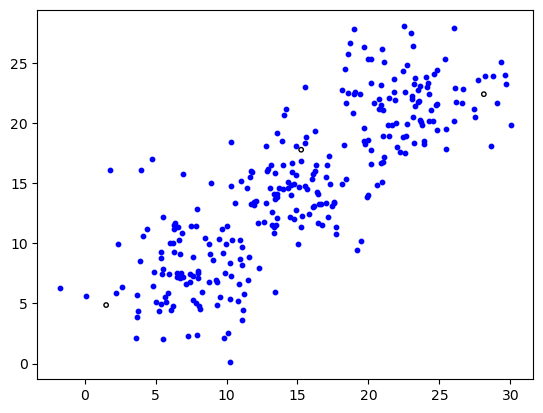

In [164]:
plot_t_days(23)

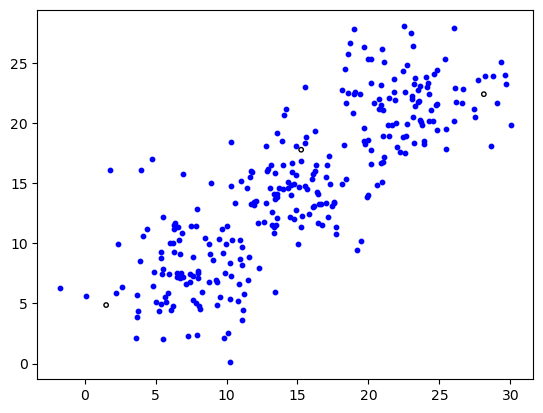

In [165]:
plot_t_days(24)

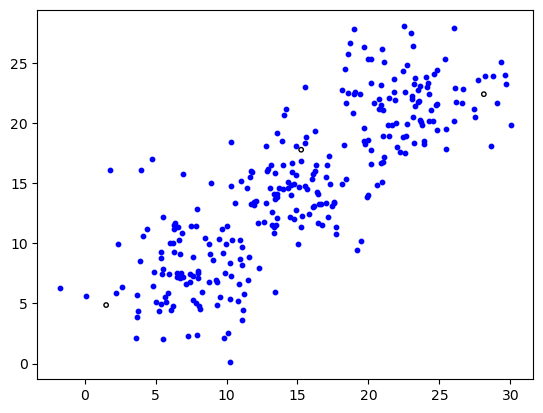

In [166]:
plot_t_days(25)

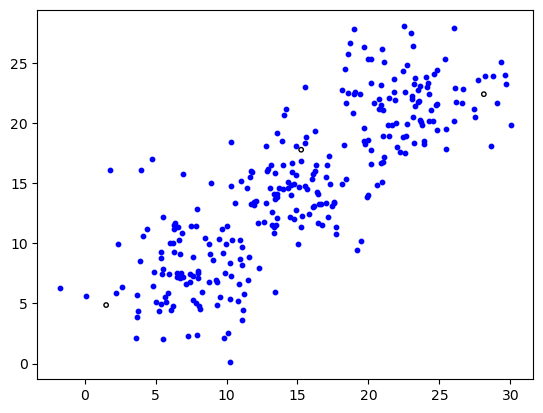

In [167]:
plot_t_days(26)

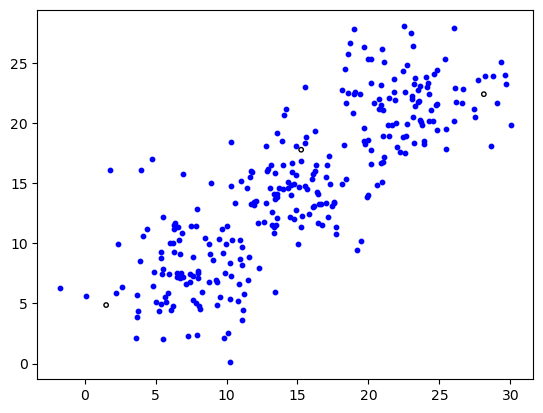

In [168]:
plot_t_days(27)

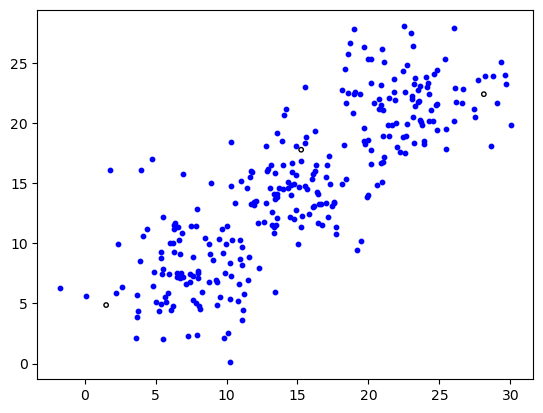

In [169]:
plot_t_days(28)

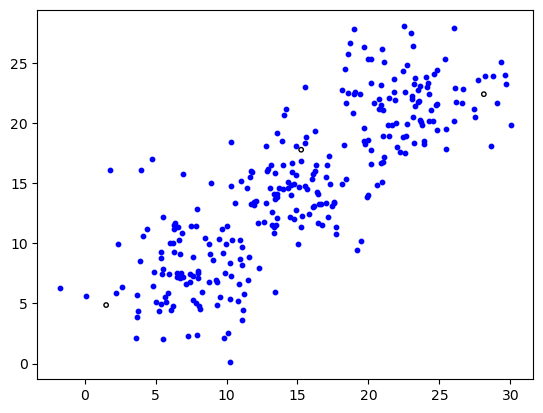

In [170]:
plot_t_days(29)

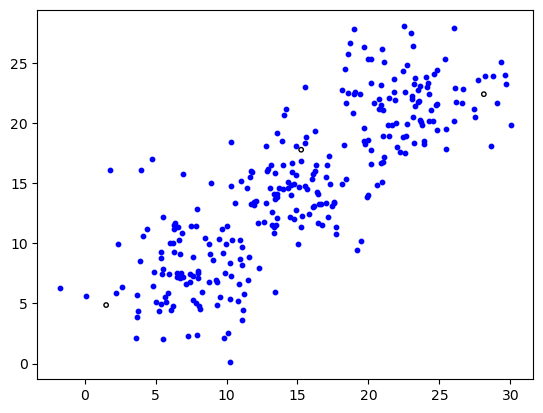

In [171]:
plot_t_days(30)

# ILM vs composite ILM
**The true value of $a_0$, $a_1$ and $\beta$ is 0.01, 0.01 and 1.** Five models were compared:
### 1.Complete Model: Without clustering
### 2.Composite ILM - Simple
After clustering, infections are allowed only within individual clusters, and $\epsilon$ is used as a spark function to permit inter-cluster communication; 
$$\epsilon_{it} = \epsilon $$
### 3.Composite ILM - K epsilon
Using $K$ (number of clusters) $\epsilon$ parameters as separate spark functions for each cluster, allowing varying susceptibility outside each class;
$$\epsilon_{it} = \epsilon_k $$
### 4.Composite ILM - Time Varying
Using $\epsilon$ multiplied by $\delta$ power of the current number of infected as a spark function, thus making cluster's "susceptibility from outside the class" change with time and external infection conditions; 
$$\epsilon_{it} = \epsilon|I_t|^{\delta}$$
### 5. Composite ILM - Between Clusters
$\epsilon$ scaled by the sum of the tilde beta exponent of the current number of infection within each cluster multiplied by between-cluster distance. This accounts not only for time-dependent changes in susceptibility but also provides a finer assessment of the influence of infections and distances from other clusters. Between-cluster distance is defined as the Euclidean distance between cluster centroids.
$$\epsilon_{it} = \epsilon\sum_{k^{'}K}|I_{tk^{'}}|d_{kk^{'}}^{-\tilde{\beta}}$$

# 1. Complete Model(Without clusters)

In [386]:
#full model
samples = pd.read_csv('samples.csv')
samples_a0 = pd.DataFrame(samples["a0"])
samples_a1 = pd.DataFrame(samples["a1"])
samples_beta = pd.DataFrame(samples["beta"])

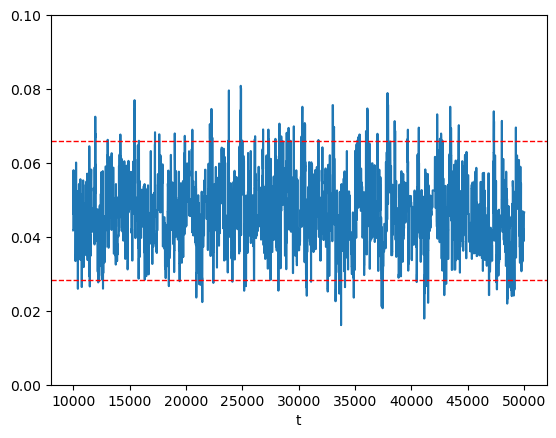

In [387]:
times = range(9999,50000)
plt.plot(times, samples_a0[9999:50000])
plt.ylim(0, 0.1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()
#plt.savefig("mixturemodel_beta11")

In [388]:
print(np.mean(samples_a0[9999:50000]))
print(samples_a0.quantile(0.025)[0], samples_a0.quantile(0.975)[0])

a0    0.046405
dtype: float64
0.0283841 0.0660317


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


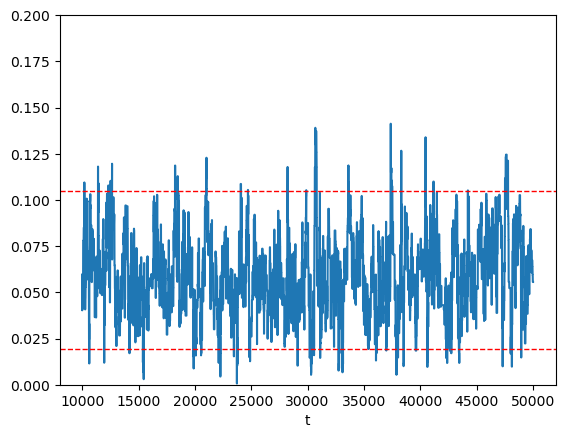

In [389]:
times = range(9999,50000)
plt.plot(times, samples_a1[9999:50000])
plt.ylim(0, 0.2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [390]:
print(np.mean(samples_a1[9999:50000]))
print(samples_a1.quantile(0.025)[0], samples_a1.quantile(0.975)[0])

a1    0.059431
dtype: float64
0.0195151 0.104895


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


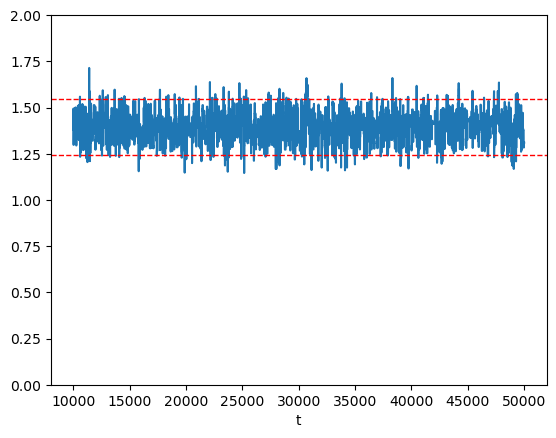

In [391]:
times = range(9999,50000)
plt.plot(times, samples_beta[9999:50000])
plt.ylim(0, 2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [392]:
print(np.mean(samples_beta[9999:50000]))
print(samples_beta.quantile(0.025)[0], samples_beta.quantile(0.975)[0])

beta    1.394331
dtype: float64
1.24088 1.544


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# 2. composite ILM - simple

In [204]:
#simple composite
samples_conposite = pd.read_csv('samples_composite.csv')
samples_composite_a0 = pd.DataFrame(samples_composite["a0"])
samples_composite_a1 = pd.DataFrame(samples_composite["a1"])
samples_composite_beta = pd.DataFrame(samples_composite["beta"])
samples_composite_epsilon = pd.DataFrame(samples_composite["epsilon"])

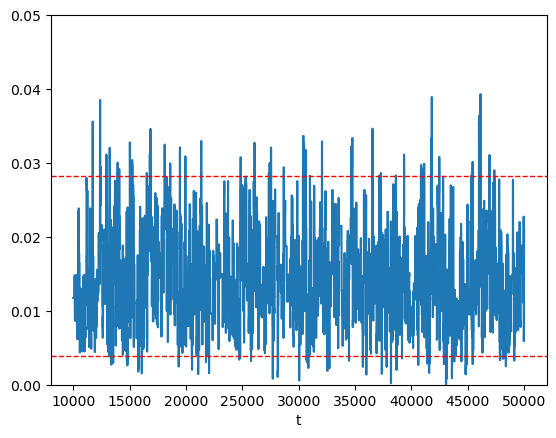

In [6]:
times = range(9999,50000)
plt.plot(times, samples_composite_a0[9999:50000])
plt.ylim(0, 0.05)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_composite_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_composite_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [18]:
print(np.mean(samples_composite_a0[9999:50000]))
print(samples_composite_a0.quantile(0.025)[0], samples_composite_a0.quantile(0.975)[0])

a0    0.014525
dtype: float64
0.00392329 0.0282623


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


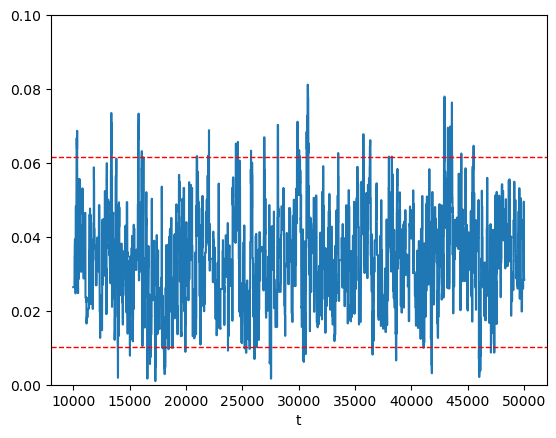

In [15]:
times = range(9999,50000)
plt.plot(times, samples_composite_a1[9999:50000])
plt.ylim(0, 0.1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_composite_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_composite_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [19]:
print(np.mean(samples_composite_a1[9999:50000]))
print(samples_composite_a1.quantile(0.025)[0], samples_composite_a1.quantile(0.975)[0])

a1    0.033622
dtype: float64
0.0101348 0.0617138


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


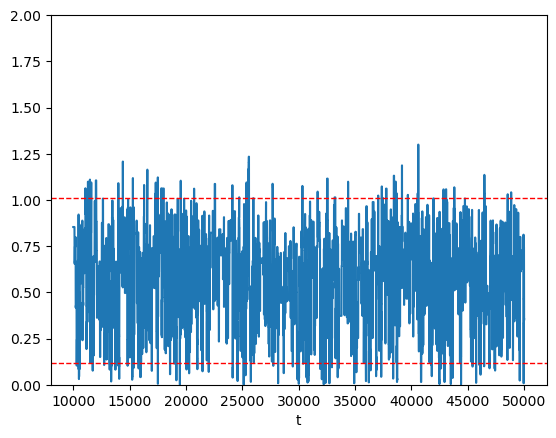

In [20]:
times = range(9999,50000)
plt.plot(times, samples_composite_beta[9999:50000])
plt.ylim(0, 2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_composite_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_composite_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [22]:
print(np.mean(samples_composite_beta[9999:50000]))
print(samples_composite_beta.quantile(0.025)[0], samples_composite_beta.quantile(0.975)[0])

beta    0.594762
dtype: float64
0.118579 1.00933


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


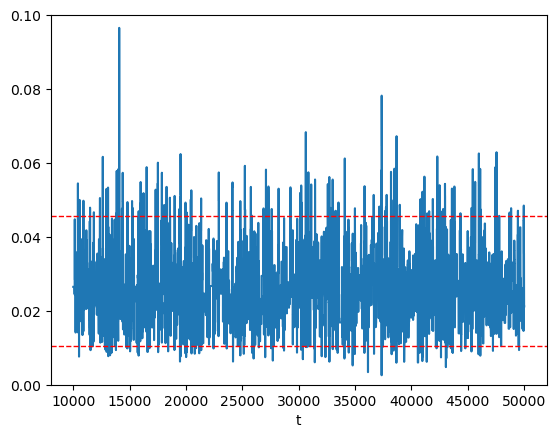

In [24]:
times = range(9999,50000)
plt.plot(times, samples_composite_epsilon[9999:50000])
plt.ylim(0, 0.1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_composite_epsilon.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_composite_epsilon.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [25]:
print(np.mean(samples_composite_epsilon[9999:50000]))
print(samples_composite_epsilon.quantile(0.025)[0], samples_composite_epsilon.quantile(0.975)[0])

epsilon    0.026088
dtype: float64
0.0104497 0.0457431


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# 3. composite ILM - K epsilon

In [203]:
#composite-K epsilon terms
samples_compositeK = pd.read_csv('samples_composite_K.csv')
samples_compositeK_a0 = pd.DataFrame(samples_compositeK["a0"])
samples_compositeK_a1 = pd.DataFrame(samples_compositeK["a1"])
samples_compositeK_beta = pd.DataFrame(samples_compositeK["beta"])
samples_compositeK_epsilon1 = pd.DataFrame(samples_compositeK["epsilon1"])
samples_compositeK_epsilon2 = pd.DataFrame(samples_compositeK["epsilon2"])
samples_compositeK_epsilon3 = pd.DataFrame(samples_compositeK["epsilon3"])


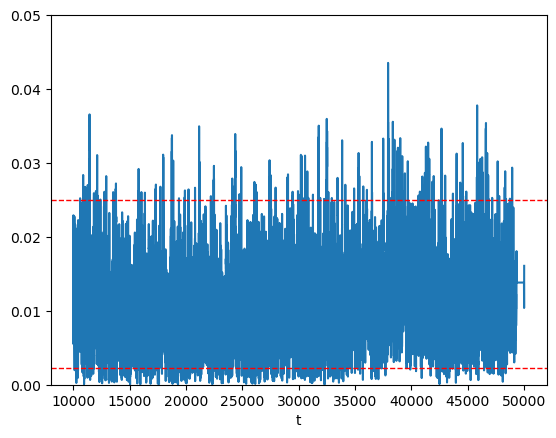

In [84]:
times = range(9999,50000)
plt.plot(times, samples_compositeK_a0[9999:50000])
plt.ylim(0, 0.05)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositeK_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositeK_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [85]:
print(np.mean(samples_compositeK_a0[9999:50000]))
print(samples_compositeK_a0.quantile(0.025)[0], samples_compositeK_a0.quantile(0.975)[0])

a0    0.011376
dtype: float64
0.00221065 0.0249521


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


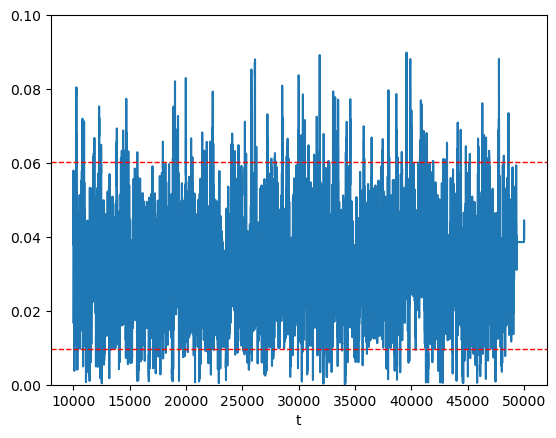

In [86]:
times = range(9999,50000)
plt.plot(times, samples_compositeK_a1[9999:50000])
plt.ylim(0, 0.1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositeK_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositeK_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [87]:
print(np.mean(samples_compositeK_a1[9999:50000]))
print(samples_compositeK_a1.quantile(0.025)[0], samples_compositeK_a1.quantile(0.975)[0])

a1    0.032404
dtype: float64
0.00958549 0.06019754250000006


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


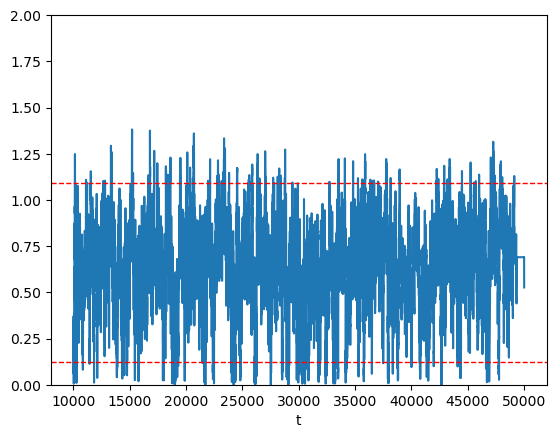

In [88]:
times = range(9999,50000)
plt.plot(times, samples_compositeK_beta[9999:50000])
plt.ylim(0, 2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositeK_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositeK_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [89]:
print(np.mean(samples_compositeK_beta[9999:50000]))
print(samples_compositeK_beta.quantile(0.025)[0], samples_compositeK_beta.quantile(0.975)[0])

beta    0.651594
dtype: float64
0.122236 1.09425


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


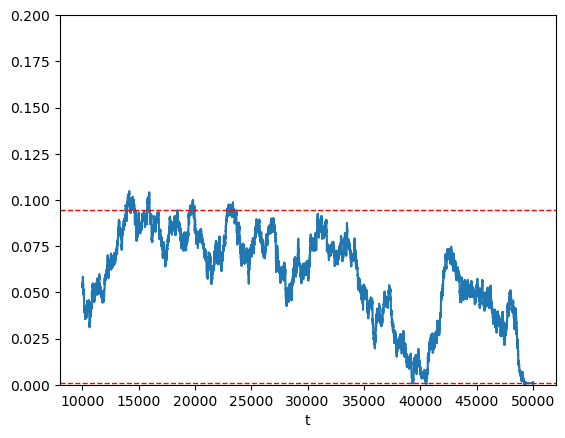

In [90]:
times = range(9999,50000)
plt.plot(times, samples_compositeK_epsilon1[9999:50000])
plt.ylim(0, 0.2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositeK_epsilon1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositeK_epsilon1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [91]:
print(np.mean(samples_compositeK_epsilon1[9999:50000]))
print(samples_compositeK_epsilon1.quantile(0.025)[0], samples_compositeK_epsilon1.quantile(0.975)[0])

epsilon1    0.05903
dtype: float64
0.000841497 0.0947703525


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


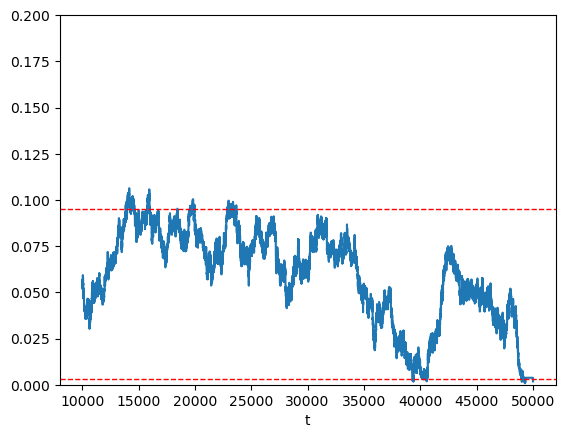

In [92]:
times = range(9999,50000)
plt.plot(times, samples_compositeK_epsilon2[9999:50000])
plt.ylim(0, 0.2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositeK_epsilon2.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositeK_epsilon2.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

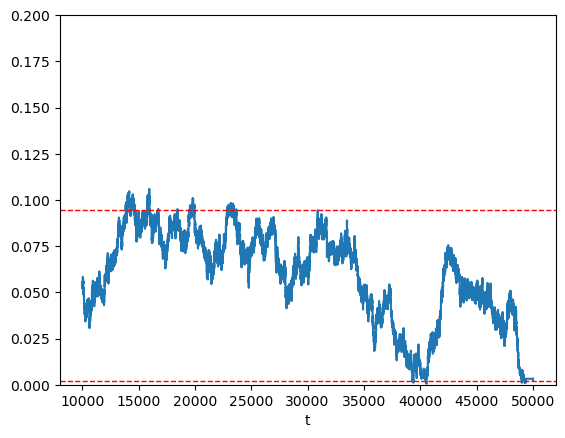

In [93]:
times = range(9999,50000)
plt.plot(times, samples_compositeK_epsilon3[9999:50000])
plt.ylim(0, 0.2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositeK_epsilon3.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositeK_epsilon3.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [94]:
print(np.mean(samples_compositeK_epsilon3[9999:50000]))
print(samples_compositeK_epsilon3.quantile(0.025)[0], samples_compositeK_epsilon3.quantile(0.975)[0])

epsilon3    0.058962
dtype: float64
0.00205205 0.0947879025


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# 4. composite ILM - time varying

In [202]:
#composite-time varying
samples_composite_tv = pd.read_csv('samples_composite_tv.csv')
samples_compositetv_a0 = pd.DataFrame(samples_composite_tv["a0"])
samples_compositetv_a1 = pd.DataFrame(samples_composite_tv["a1"])
samples_compositetv_beta = pd.DataFrame(samples_composite_tv["beta"])
samples_compositetv_epsilon = pd.DataFrame(samples_composite_tv["epsilon"])
samples_compositetv_delta = pd.DataFrame(samples_composite_tv["delta"])

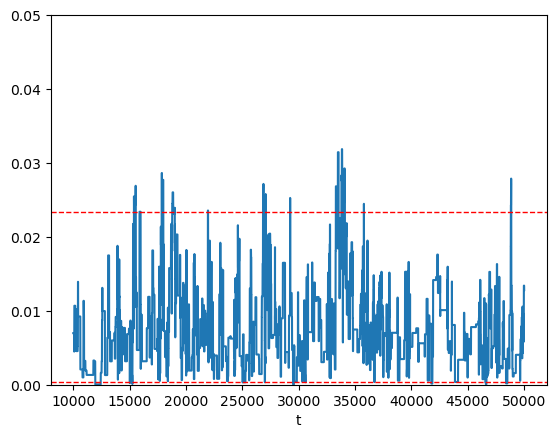

In [203]:
times = range(9999,50000)
plt.plot(times, samples_compositetv_a0[9999:50000])
plt.ylim(0, 0.05)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositetv_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositetv_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [204]:
print(np.mean(samples_compositetv_a0[9999:50000]))
print(samples_compositetv_a0.quantile(0.025)[0], samples_compositetv_a0.quantile(0.975)[0])

a0    0.007631
dtype: float64
0.000352817 0.0233999


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


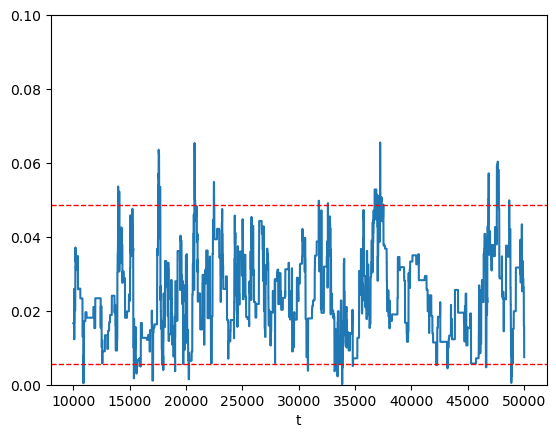

In [205]:
times = range(9999,50000)
plt.plot(times, samples_compositetv_a1[9999:50000])
plt.ylim(0, 0.1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositetv_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositetv_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [159]:
print(np.mean(samples_compositetv_a1[9999:50000]))
print(samples_compositetv_a1.quantile(0.025)[0], samples_compositetv_a1.quantile(0.975)[0])

a1    0.030097
dtype: float64
0.00898774 0.0546754


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


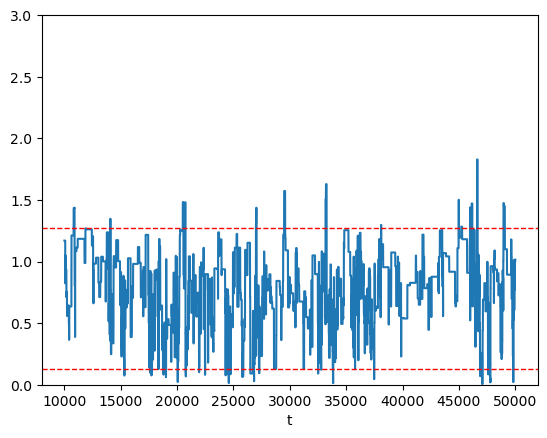

In [175]:
times = range(9999,50000)
plt.plot(times, samples_compositetv_beta[9999:50000])
plt.ylim(0, 3)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositetv_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositetv_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [176]:
print(np.mean(samples_compositetv_beta[9999:50000]))
print(samples_compositetv_beta.quantile(0.025)[0], samples_compositetv_beta.quantile(0.975)[0])

beta    0.802126
dtype: float64
0.127737 1.2687


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


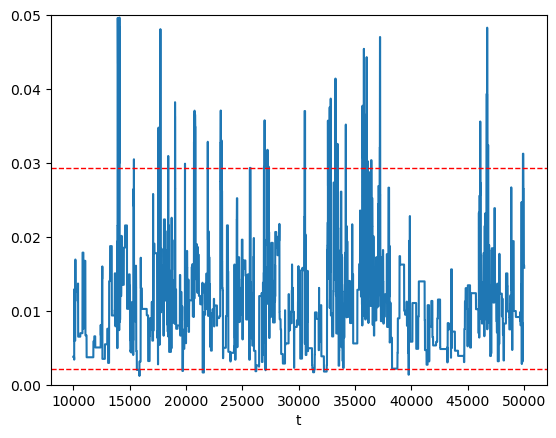

In [177]:
times = range(9999,50000)
plt.plot(times, samples_compositetv_epsilon[9999:50000])
plt.ylim(0, 0.05)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositetv_epsilon.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositetv_epsilon.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [178]:
print(np.mean(samples_compositetv_epsilon[9999:50000]))
print(samples_compositetv_epsilon.quantile(0.025)[0], samples_compositetv_epsilon.quantile(0.975)[0])

epsilon    0.01086
dtype: float64
0.00217489 0.0293294


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


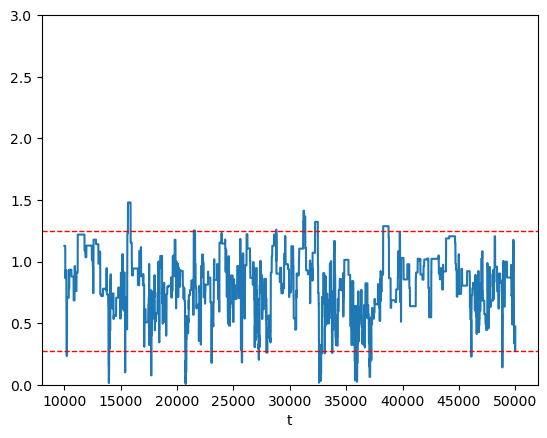

In [179]:
times = range(9999,50000)
plt.plot(times, samples_compositetv_delta[9999:50000])
plt.ylim(0, 3)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositetv_delta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositetv_delta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [180]:
print(np.mean(samples_compositetv_delta[9999:50000]))
print(samples_compositetv_delta.quantile(0.025)[0], samples_compositetv_delta.quantile(0.975)[0])

delta    0.825838
dtype: float64
0.273417 1.2515


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# 5.composite ILM - between clusters

In [377]:
#composite-between clusters
samples_composite_bc = pd.read_csv('samples_composite_bc.csv')
samples_compositebc_a0 = pd.DataFrame(samples_composite_bc["a0"])
samples_compositebc_a1 = pd.DataFrame(samples_composite_bc["a1"])
samples_compositebc_beta = pd.DataFrame(samples_composite_bc["beta"])
samples_compositebc_epsilon = pd.DataFrame(samples_composite_bc["eps"])

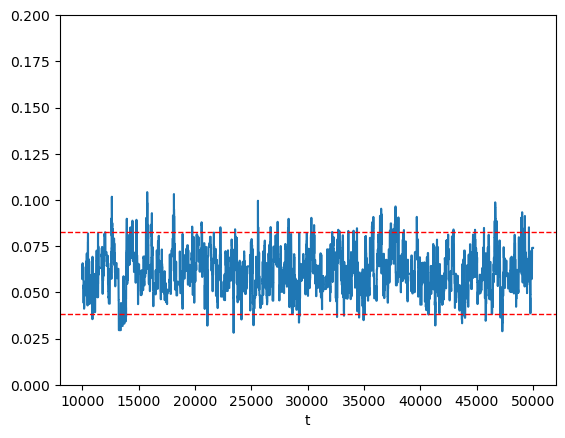

In [378]:
times = range(9999,50000)
plt.plot(times, samples_compositebc_a0[9999:50000])
plt.ylim(0, 0.2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositebc_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositebc_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [379]:
print(np.mean(samples_compositebc_a0[9999:50000]))
print(samples_compositebc_a0.quantile(0.025)[0], samples_compositebc_a0.quantile(0.975)[0])

a0    0.060926
dtype: float64
0.0382935 0.0826289


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


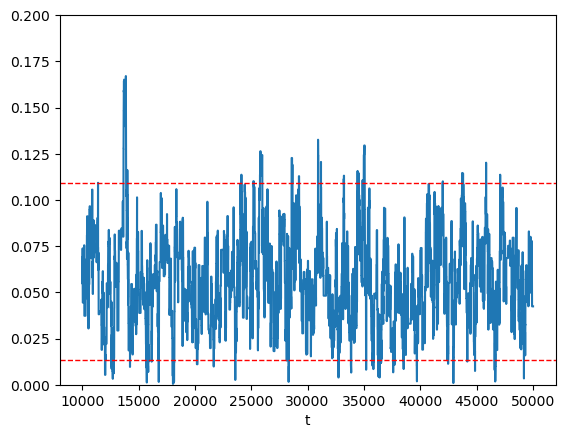

In [380]:
times = range(9999,50000)
plt.plot(times, samples_compositebc_a1[9999:50000])
plt.ylim(0, 0.2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositebc_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositebc_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [381]:
print(np.mean(samples_compositebc_a1[9999:50000]))
print(samples_compositebc_a1.quantile(0.025)[0], samples_compositebc_a1.quantile(0.975)[0])

a1    0.056549
dtype: float64
0.0131591 0.108914


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


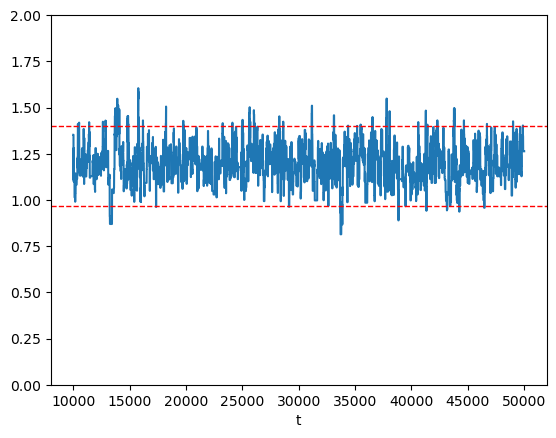

In [382]:
times = range(9999,50000)
plt.plot(times, samples_compositebc_beta[9999:50000])
plt.ylim(0, 2)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositebc_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositebc_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [383]:
print(np.mean(samples_compositebc_beta[9999:50000]))
print(samples_compositebc_beta.quantile(0.025)[0], samples_compositebc_beta.quantile(0.975)[0])

beta    1.192137
dtype: float64
0.966123 1.39986


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


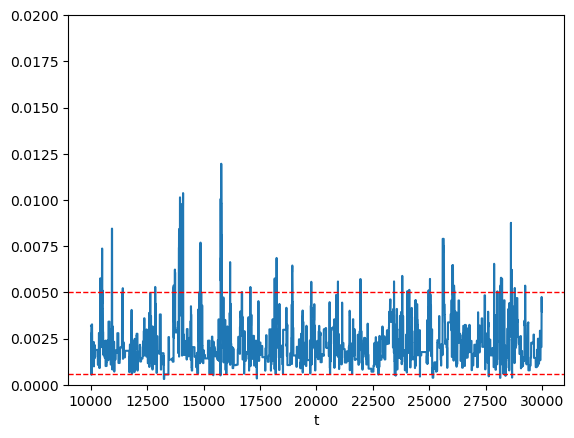

In [384]:
times = range(9999,30000)
plt.plot(times, samples_compositebc_epsilon[9999:30000])
plt.ylim(0, 0.02)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_compositebc_epsilon.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_compositebc_epsilon.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [385]:
print(np.mean(samples_compositebc_epsilon[9999:50000]))
print(samples_compositebc_epsilon.quantile(0.025)[0], samples_compositebc_epsilon.quantile(0.975)[0])

eps    0.002178
dtype: float64
0.000600674 0.00501002


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Next...
1. use infection time to cluster the population? but the distance between clusters will not represent the actual distances if the between-cluster distances >> within-cluster distances
2. model misspecification problem and the convergence of $\epsilon$?
$$(a_0+a_1*S_i)\sum d_{ij}^{-\beta}+\epsilon(\sum_{k^{'}}|I_{k^{'}}|d_{ik^{'}}^{-\tilde{\beta}})$$
$$S_i\sim U(0,1)$$
$\epsilon_{i}$ should be $a_0+a_1*S_i$, then $\epsilon\sim U(a_0, a_0+a_1)$, the $\hat\epsilon$ will converge to the posterior mode, change the distribution of $S_i$ to Gaussian?
3. inflation or other treatment on subposterior before summing up(inspired by LISA)?